In [2]:
import pandas as pd
import datetime
import seaborn as sns
import requests
import kaggle
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

How do I download using requests / API? 
https://github.com/Kaggle/kaggle-api <br>
kaggle datasets download -d christophercorrea/dc-residential-properties <br> 

**General Exploration of the Data:**

In [3]:
#how do I not write the entire file path?
data = pd.read_csv('/Users/Julia/Desktop/bootcamp/dc_capstone/DC_Properties.csv', low_memory=False)
print(data.shape)
print(data.columns.tolist())
data.head()

(158957, 49)
['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT']


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [4]:
ddat = pd.DataFrame.drop(data, columns = 'Unnamed: 0')

In [5]:
#percentages of NaN values per column
def perc_nan(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    print(percnan)
perc_nan(ddat)

BATHRM                0.000000
HF_BATHRM             0.000000
HEAT                  0.000000
AC                    0.000000
NUM_UNITS             0.328774
ROOMS                 0.000000
BEDRM                 0.000000
AYB                   0.001705
YR_RMDL               0.490881
EYB                   0.000000
STORIES               0.329051
SALEDATE              0.168410
PRICE                 0.382122
QUALIFIED             0.000000
SALE_NUM              0.000000
GBA                   0.328774
BLDG_NUM              0.000000
STYLE                 0.328774
STRUCT                0.328774
GRADE                 0.328774
CNDTN                 0.328774
EXTWALL               0.328774
ROOF                  0.328774
INTWALL               0.328774
KITCHENS              0.328781
FIREPLACES            0.000000
USECODE               0.000000
LANDAREA              0.000000
GIS_LAST_MOD_DTTM     0.000000
SOURCE                0.000000
CMPLX_NUM             0.671226
LIVING_GBA            0.671226
FULLADDR

In [6]:
#delete NaN rows from X, Y, and ASSESSMENT_NBHD so we can use them as reference points for filling others
ddat = ddat.dropna(subset=['X', 'Y', 'ASSESSMENT_NBHD'])

In [7]:
#Are values the same for CITY and STATE?
print(ddat.CITY.value_counts())
print(ddat.STATE.value_counts())

WASHINGTON    105815
Name: CITY, dtype: int64
DC    105815
Name: STATE, dtype: int64


In [8]:
ddat = pd.DataFrame.drop(ddat, columns=['GIS_LAST_MOD_DTTM', 'BLDG_NUM', 'CMPLX_NUM', 'STATE', 'CITY', 'FULLADDRESS', 'NATIONALGRID'])
print(ddat.shape)

(158720, 41)


**Creating the dataset for price prediction:**

In [9]:
#We will make a small dataset, which contains no null values from price. 
sdat = ddat.dropna(subset=['PRICE'])
print(sdat.shape)

(98115, 41)


In [10]:
#if we remove all NaNs, we have no data.
nandat = sdat.dropna()
nandat.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,SOURCE,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [11]:
#TWO LISTS OF COLUMNS. ONE CATEGORICAL, ONE NUMERICAL: catcol and numcol
#TWO corresponding dataframes: catdf and numdf

sdat.NUM_UNITS.astype('category')
catcol = []
numcol = []

for col in sdat.columns:
    if (sdat[col].dtype == object):
        catcol.append(col)
    if (sdat[col].dtype == np.int64) or (sdat[col].dtype == np.float64):
        numcol.append(col)
        
catdf = sdat[catcol].astype('category')
numdf = sdat[numcol].astype(np.float64)

print(catcol)
print(numcol)

['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'SOURCE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'QUADRANT']
['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'LIVING_GBA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'X', 'Y']


**Outlier detection for numerical columns:**

In [12]:
#show information about values, outlier counts, and fences per numerical variable 
#this will assist in evaluating the revelence of an outlier calculated via quantile method
def show_outliers(df_in, col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print(col)
    print("fence_low:", fence_low) 
    print("Q1:", q1)
    print("Q3:", q3) 
    print("fence_high:", fence_high)
    print("num_outliers:", len(df_out))
    print((df_in[col].value_counts().sort_index()))
    print('')
    print('')
#for col in numdf.columns:
    #show_outliers(numdf, col)

In [13]:
#some columns look skew. 
#Let's find a way to eliminate outliers without eliminating too much skew by adjusting fences. 
def perc_outliers(df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print("Percentage of outliers:", len(df_out)/len(df_in))

In [14]:
stat, p = stats.shapiro(sdat.LIVING_GBA)
print('Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')

Statistic=nan, p=1.000
Sample looks Gaussian (fail to reject H0).


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Percentage of outliers: 0.016766039851195028
None


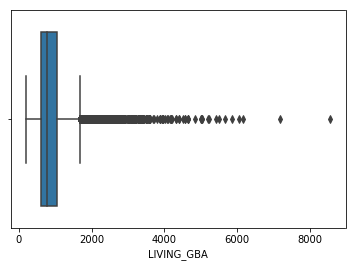

In [15]:
print(perc_outliers(sdat, 'LIVING_GBA', 1.5, 1.5))
sns.boxplot(x=sdat['LIVING_GBA'], whis=1.5)

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


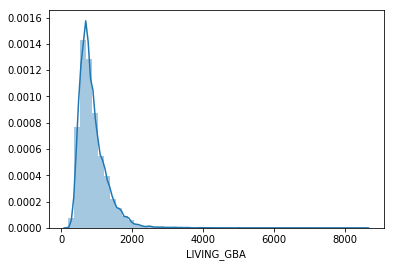

In [16]:
sns.distplot(sdat['LIVING_GBA'].dropna())

In [17]:
###### stat, p = stats.shapiro(sdat.GBA)
print('Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')

Statistic=nan, p=1.000
Sample looks Gaussian (fail to reject H0).


Percentage of outliers: 0.035896651888090506
None


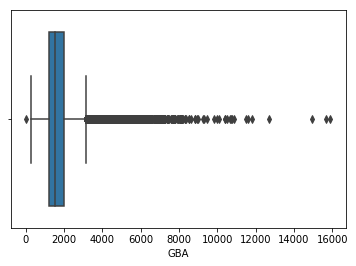

In [19]:
print(perc_outliers(sdat, 'GBA', 1.5, 1.5))
sns.boxplot(x=sdat['GBA'], whis=1.5)

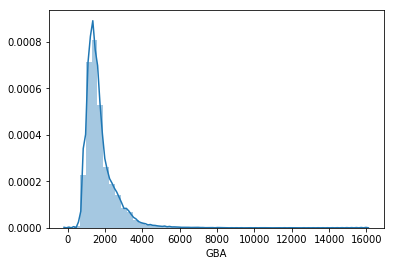

In [20]:
sns.distplot(sdat['GBA'].dropna())

In [21]:
stat, p = stats.shapiro(sdat.PRICE)
print('Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')

Statistic=0.054, p=0.000
Sample does not look Gaussian (reject H0).


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Percentage of outliers: 0.013626866432247873
None


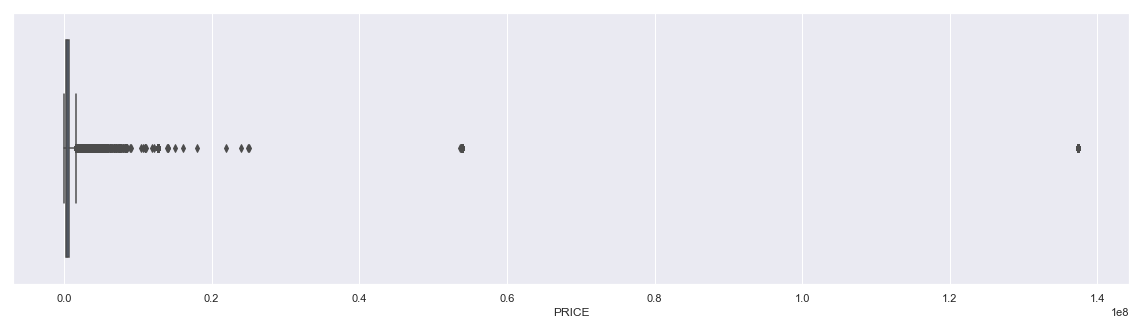

In [22]:
print(perc_outliers(sdat, 'PRICE', 1, 4.5))
sns.set()
plt.figure(figsize=(20, 5))
sns.boxplot(x=sdat['PRICE'], whis=2.5)

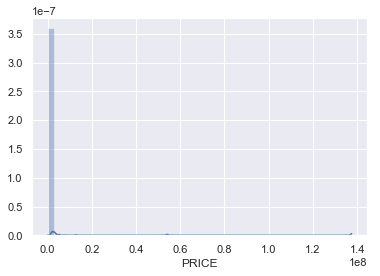

In [23]:
sns.distplot(sdat['PRICE'].dropna())

In [24]:
stat, p = stats.shapiro(sdat.LANDAREA)
print('Statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0).')
else:
    print('Sample does not look Gaussian (reject H0).')

Statistic=0.593, p=0.000
Sample does not look Gaussian (reject H0).


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Percentage of outliers: 0.008673495388065026
None


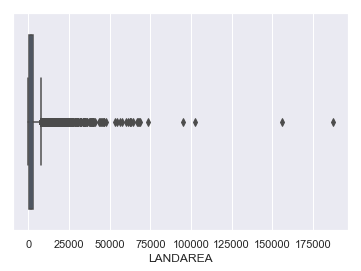

In [25]:
print(perc_outliers(sdat, 'LANDAREA', 1, 4.5))
sns.boxplot(x=sdat['LANDAREA'], whis=2.5)

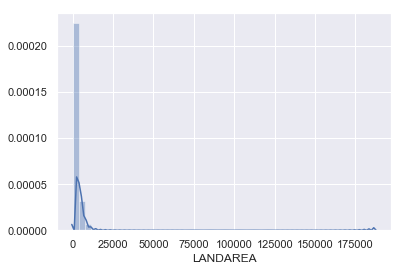

In [26]:
sns.distplot(sdat['LANDAREA'].dropna())

**Outlier detection for categorical data:**

In [27]:
#checking values for categorical data:
#for col in catdf.columns:
   # print(col) 
   # print(catdf[col].value_counts().sort_index())
   # print("")
   # print("")

**Removing outliers:**

In [28]:
#The only data that was likely faulty (and not just out of "the norm") was
#STORIES: 250.00, 275.00, 826.00        
#YR_RMDL: 20
#FIREPLACES: 4068.0, 1017.0, 1601.0, 922.0

odat2 = sdat.loc[((sdat['STORIES'] < 30) | (sdat['STORIES'].isna())) & (sdat['FIREPLACES'] < 12) & ((sdat['YR_RMDL'] >= 1880) | (sdat['YR_RMDL'].isna()))]

print(odat2.shape)

(98101, 41)


In [29]:
#Numerical:
#Create a list of all row indices matching outliers from specified columns.
takind = []
def remove_outliers (df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    global iout
    iout = (df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]).index.tolist()
    for i in iout:
        if i not in takind:
            takind.append(i) 
    
remove_outliers(odat2, 'GBA', 1.5, 6)
remove_outliers(odat2, 'LIVING_GBA', 1.5, 6)
remove_outliers(odat2, 'LANDAREA', 1, 10)
remove_outliers(odat2, 'PRICE', 1, 8)
print(len(takind))

875


In [30]:
#Remove those rows
odatd = odat2.drop(index=takind)
print(odatd.shape)

(97226, 41)


**Removing and replacing null values using location for fill value predictions:**

In [31]:
#percentage of missing data per row in new dataset
def missingdat(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    nulcolstat = percnan[percnan>0]
    nullist = (nulcolstat.index).tolist()
    nuldat = sdat[nullist]
    print(nulcolstat)
print(missingdat(odatd))

NUM_UNITS             0.409150
AYB                   0.001121
YR_RMDL               0.414004
STORIES               0.409469
SALEDATE              0.000010
GBA                   0.409150
STYLE                 0.409150
STRUCT                0.409150
GRADE                 0.409150
CNDTN                 0.409150
EXTWALL               0.409150
ROOF                  0.409150
INTWALL               0.409150
KITCHENS              0.409160
LIVING_GBA            0.590850
ASSESSMENT_SUBNBHD    0.202919
CENSUS_BLOCK          0.412503
dtype: float64
None


In [32]:
#create categorical and numerical dataframes
catcol = []
numcol = []
for col in odatd.columns:
    if (odatd[col].dtype == object):
        catcol.append(col)
    if (odatd[col].dtype == np.int64) or (odatd[col].dtype == np.float64):
        numcol.append(col)
catdf = odatd[catcol].astype('category')
numdf = odatd[numcol].astype(np.float64)

**Filling numerical nulls using mean values according to neighborhoods:**

In [33]:
odatd.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'SOURCE', 'LIVING_GBA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [34]:
#NUM df with nulls:
numnulls = numdf.columns[numdf.isna().any()].tolist()
numnulldf = numdf[numnulls]
#NUM df without nulls:
numgooddf = numdf.drop(columns=numnulls)

In [35]:
#DF with median via neighborhood with WARD for grouping perspective. 
meandf= pd.DataFrame()
for col in numdf.columns:
    meandf[col] = (odatd.groupby(['WARD', 'ASSESSMENT_NBHD'])[col].apply(lambda x: x.median()))
meandf.head(10)

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


BATHRM  HF_BATHRM  NUM_UNITS  ROOMS  BEDRM     AYB  \
WARD   ASSESSMENT_NBHD                                                        
Ward 1 Columbia Heights     2.0        0.0        1.0    5.0    2.0  1915.0   
       Kalorama             1.0        0.0        2.0    4.0    1.0  1912.0   
       Ledroit Park         2.0        1.0        1.0    6.0    3.0  1907.0   
       Mt. Pleasant         2.0        0.0        1.0    4.0    2.0  1923.0   
       Old City 2           2.0        0.0        1.0    5.0    2.0  1990.0   
Ward 2 Burleith             3.0        1.0        1.0    7.0    3.0  1929.0   
       Central-tri 1        1.0        0.0        2.0    4.0    1.0  1978.0   
       Central-tri 3        1.0        0.0        NaN    3.0    1.0  2004.0   
       Foggy Bottom         1.0        0.0        1.0    3.0    1.0  1962.0   
       Georgetown           2.0        1.0        1.0    6.0    2.0  1900.0   

                         YR_RMDL     EYB  STORIES     PRICE  SALE_NUM     GBA  \
WARD   ASSESSMENT_NBHD                                                          
Ward 1 Columbia Heights   2007.0  1957.0     2.00  424000.0       1.0  1504.0   
       Kalorama           1983.0  1919.0     3.00  425000.0       1.0  3006.0   
       Ledroit Park       2008.0  1964.0     2.00  439950.0       1.0  1480.0   
       Mt. Pleasant       2006.0  1967.0     2.25  527450.0       1.0  1896.5   
       Old City 2         2005.0  1969.0     2.00  546000.0       1.0  1472.0   
Ward 2 Burleith           2005.0  1969.0     2.00  859000.0       1.0  1640.0   
       Central-tri 1      1982.0  1974.0     3.00  439000.0       1.0  2293.0   
       Central-tri 3      2007.0  2004.0      NaN  455000.0       1.0     NaN   
       Foggy Bottom       1981.0  1962.0     2.00  271500.0       1.0  1224.0   
       Georgetown         2003.0  1980.0     2.00  820000.0       1.0  1748.0   

                         KITCHENS  FIREPLACES  USECODE  LANDAREA  LIVING_GBA  \
WARD   ASSESSMENT_NBHD                                                         
Ward 1 Columbia Heights       1.0         0.0     16.0     841.0       809.0   
       Kalorama               2.0         0.0     17.0     371.0       779.0   
       Ledroit Park           1.0         0.0     12.0    1235.5       786.0   
       Mt. Pleasant           1.0         0.0     16.0     603.0       860.0   
       Old City 2             1.0         0.0     16.0     508.0       882.0   
Ward 2 Burleith               1.0         1.0     11.0    2281.0      1688.5   
       Central-tri 1          2.0         0.0     17.0     191.0       794.0   
       Central-tri 3          NaN         0.0     17.0      95.0       810.0   
       Foggy Bottom           1.0         0.0     17.0     137.0       575.5   
       Georgetown             1.0         1.0     13.0    1065.0       949.0   

                         ZIPCODE   LATITUDE  LONGITUDE  CENSUS_TRACT  \
WARD   ASSESSMENT_NBHD                                                 
Ward 1 Columbia Heights  20010.0  38.929071 -77.029323        3200.0   
       Kalorama          20009.0  38.919628 -77.045027        4001.0   
       Ledroit Park      20001.0  38.916561 -77.017442        3400.0   
       Mt. Pleasant      20009.0  38.925946 -77.040026        3800.0   
       Old City 2        20009.0  38.917868 -77.029313        4400.0   
Ward 2 Burleith          20007.0  38.915337 -77.073668         300.0   
       Central-tri 1     20037.0  38.905876 -77.049043        5500.0   
       Central-tri 3     20004.0  38.899013 -77.022462        5800.0   
       Foggy Bottom      20037.0  38.901502 -77.052481        5600.0   
       Georgetown        20007.0  38.908904 -77.063192         100.0   

                                 X          Y  
WARD   ASSESSMENT_NBHD                         
Ward 1 Columbia Heights -77.028848  38.929164  
       Kalorama         -77.045029  38.919557  
       Ledroit Park     -77.017749  38.916334  
       Mt. Pleasant     -77.040066  3

In [36]:
#Finding missing data in meandf:
nulmeancol = meandf.columns[meandf.isnull().any()]
nulmeanind = (meandf[meandf.isnull().any(axis=1)]).index.tolist()
print(nulmeancol)
print("")
print(nulmeanind)
#meandf[nulmeancol]

Index(['NUM_UNITS', 'STORIES', 'GBA', 'KITCHENS', 'LIVING_GBA'], dtype='object')

[('Ward 2', 'Central-tri 3'), ('Ward 3', 'Foxhall'), ('Ward 3', 'Massachusetts Avenue Heights'), ('Ward 3', 'Woodley'), ('Ward 4', 'Chevy Chase'), ('Ward 4', 'Colonial Village'), ('Ward 4', 'Crestwood'), ('Ward 4', 'Hawthorne'), ('Ward 4', 'Riggs Park'), ('Ward 4', 'Shepherd Heights'), ('Ward 5', 'Michigan Park'), ('Ward 5', 'Riggs Park'), ('Ward 7', 'Anacostia')]


In [37]:
#Filling missing data in central tri-3 with data from central tri-1:
fillcols = meandf.columns[(meandf.loc[('Ward 2', 'Central-tri 3')].isnull())]
meandf.loc[('Ward 2', 'Central-tri 3'), fillcols] = meandf.loc[('Ward 2', 'Central-tri 1'), fillcols]

In [38]:
#Filling the rest of meandf with median of Wards. 
for col in meandf:
    meandf[col] = meandf[col].transform(lambda x: x.fillna(x.median()))

In [39]:
#prepare df to use as dict to fill NaNs:
meandf = meandf.reset_index(level='WARD')

In [40]:
#filling missing numerical data
numfilleddf = pd.DataFrame()
numdf2 = pd.concat([numdf, odatd['ASSESSMENT_NBHD']], axis=1).astype('category')
for col in numnulldf.columns:
    #get index of missing values
    colindex = numdf2[numdf2[col].isnull()].index.tolist()
    #generate mean dictionary
    coldict = dict(zip(meandf.index, meandf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(numdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in numdf2[col].cat.categories:
            numdf2[col] = numdf2[col].cat.add_categories([filler])
        numfilleddf[col] = numdf2[col].fillna(filler)

**Filling categorical null values using mode values according to neighborhoods:**

In [41]:
#CAT df with nulls 
catnulls = catdf.columns[catdf.isna().any()].tolist()
catnulldf = catdf[catnulls]
#CAT df without nulls 
catgooddf = catdf.drop(columns=catnulls)

In [42]:
#Df with mode values. 
modedf = pd.DataFrame()
for col in catdf.columns:
    modedf[col] = odatd.groupby('ASSESSMENT_NBHD')[col].apply(lambda x: x.mode())
modedf.head()

,,HEAT,AC,SALEDATE,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,SOURCE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
ASSESSMENT_NBHD,,,,,,,,,,,,,,,,,,,
16th Street Heights,0,Hot Water Rad,Y,2016-08-18 00:00:00,Q,2 Story,Single,Good Quality,Good,Common Brick,Metal- Sms,Hardwood,Residential,16th Street Heights,049 A 16th Street Heights,002001 2010,Ward 4,2798,NW
American University,0,Warm Cool,Y,2005-09-30 00:00:00,Q,2 Story,Single,Good Quality,Good,Common Brick,Slate,Hardwood,Residential,American University,001 B American University,001001 1013,Ward 3,1730,NW
Anacostia,0,Forced Air,Y,2013-07-16 00:00:00,Q,2 Story,Row Inside,Average,Average,Common Brick,Metal- Sms,Hardwood,Residential,Anacostia,002 B Anacostia,007504 1004,Ward 8,5807,SE
Barry Farms,0,Forced Air,Y,2010-05-04 00:00:00,Q,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,Condominium,Barry Farms,NaN,007407 2008,Ward 8,5869,SE
Berkley,0,Warm Cool,Y,2018-05-29 00:00:00,Q,2 Story,Single,Excellent,Good,Common Brick,Comp Shingle,Hardwood,Residential,Berkley,004 A Berkley,000801 2008,Ward 3,1368,NW


In [43]:
#Filling NaNs in mode df:

#find which groups have no subneighborhoods assigned
subindex = modedf[modedf['ASSESSMENT_SUBNBHD'].isnull()].index.tolist()

#get neighborhoods for each of those groups:
subnlist = []
for num in subindex:
    subnlist.append(modedf.loc[num, 'ASSESSMENT_NBHD'])
    
#assign neighborhood name to subneighborhood name:
fillvals = []
for i, val in zip(subindex, subnlist):
    modedf.loc[i, 'ASSESSMENT_SUBNBHD'] = val

In [44]:
#filling Central-tri 3 data with central-tri 1 data
print((modedf[modedf.isnull().any(axis=1)]).index.tolist())
modedf = modedf.fillna(method='ffill')

[('Central-tri 3', 0)]


In [45]:
#filling missing categorical data

catfilleddf = pd.DataFrame()
catdf2 = catdf
for col in catnulldf.columns:
    #get index of missing values
    colindex = catdf2[catdf2[col].isnull()].index.tolist()
    #generate mode dictionary
    coldict = dict(zip(modedf['ASSESSMENT_NBHD'], modedf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(catdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in catdf2[col].cat.categories:
            catdf2[col] = catdf2[col].cat.add_categories([filler])
        catfilleddf[col] = catdf2[col].fillna(filler)

**Creating final dataframe by joining filled categorical and numerical dataframes:**

In [46]:
finaldf = (pd.concat([catgooddf, catfilleddf, numgooddf, numfilleddf], axis=1))
print(finaldf.shape)
print(missingdat(finaldf))

#create new bathrms column
BATHRMS = finaldf.BATHRM + .5*(finaldf.HF_BATHRM)
finaldf['BATHRMS'] = BATHRMS 

finaldf

(97226, 41)
Series([], dtype: float64)
None


,HEAT,AC,QUALIFIED,SOURCE,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT,SALEDATE,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,PRICE,SALE_NUM,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y,NUM_UNITS,AYB,YR_RMDL,STORIES,GBA,KITCHENS,LIVING_GBA,BATHRMS
0,Warm Cool,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2003-11-25 00:00:00,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,040 D Old City 2,004201 2006,4.0,0.0,8.0,4.0,1972.0,1095000.0,1.0,5.0,24.0,1680.0,20009.0,38.914680,-77.040832,4201.0,-77.040429,38.914881,2.0,1910.0,1988.0,3.0,2522.0,2.0,700.0,4.0
2,Hot Water Rad,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2016-06-21 00:00:00,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2006,3.0,1.0,9.0,5.0,1984.0,2100000.0,3.0,4.0,24.0,1680.0,20009.0,38.914684,-77.040678,4201.0,-77.040429,38.914881,2.0,1910.0,2009.0,3.0,2522.0,2.0,700.0,3.5
3,Hot Water Rad,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2006-07-12 00:00:00,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2006,3.0,1.0,8.0,5.0,1984.0,1602000.0,1.0,3.0,24.0,1680.0,20009.0,38.914683,-77.040629,4201.0,-77.040429,38.914881,2.0,1900.0,2003.0,3.0,2484.0,2.0,700.0,3.5
5,Hot Water Rad,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2010-02-26 00:00:00,4 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2006,3.0,2.0,10.0,5.0,1972.0,1950000.0,1.0,4.0,11.0,2196.0,20009.0,38.914331,-77.039715,4201.0,-77.040429,38.914881,1.0,1913.0,2007.0,4.0,5344.0,1.0,700.0,4.0
7,Hot Water Rad,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2011-09-29 00:00:00,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,040 D Old City 2,004201 2005,3.0,1.0,8.0,4.0,1972.0,1050000.0,1.0,1.0,24.0,1627.0,20009.0,38.915408,-77.040129,4201.0,-77.040429,38.914881,2.0,1906.0,2011.0,3.0,2401.0,2.0,700.0,3.5
8,Warm Cool,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2018-05-03 00:00:00,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2005,3.0,1.0,7.0,3.0,1967.0,1430000.0,4.0,1.0,24.0,1424.0,20009.0,38.915017,-77.039903,4201.0,-77.040429,38.914881,2.0,1908.0,2008.0,2.0,1488.0,2.0,700.0,3.5
14,Warm Cool,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2011-09-30 00:00:00,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,040 D Old City 2,004201 2005,3.0,1.0,5.0,3.0,1967.0,1325000.0,1.0,1.0,24.0,1815.0,20009.0,38.915038,-77.039716,4201.0,-77.040429,38.914881,2.0,1917.0,2000.0,2.0,2692.0,2.0,700.0,3.5
16,Warm Cool,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2010-11-04 00:00:00,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,040 D Old City 2,004201 2005,3.0,1.0,8.0,3.0,1967.0,1240000.0,1.0,0.0,11.0,1424.0,20009.0,38.915018,-77.039844,4201.0,-77.040429,38.914881,1.0,1908.0,2006.0,2.0,1662.0,1.0,700.0,3.5
19,Hot Water Rad,Y,Q,Residential,Old City 2,Ward 2,0152,NW,2001-07-23 00:00:00,2 Story,Row Inside,Good Quality,Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2005,3.0,1.0,9.0,3.0,1969.0,592250.0,1.0,1.0,24.0,1424.0,20009.0,38.915019,-77.040138,4201.0,-77.040429,38.914881,2.0,1908.0,2013.0,2.0,1598.0,2.0,700.0,3.5
20,Hot Water Rad,Y,U,Residential,Old City 2,Ward 2,0208,NW,2016-01-12 00:00:00,3 Story,Semi-Detached,Very Good,Very Good,Common Brick,Built Up,Hardwood,040 E Old City 2,005201 4003,3.0,1.0,14.0,5.0,1987.0,33232.0,3.0,3.0,13.0,2090.0,20009.0,38.911370,-77.033774,5201.0,-77.033366,38.911716,1.0,1880.0,2009.0,3.0,3465.0,1.0,700.0,3.5


In [47]:
finaldf = finaldf.rename(index=str, columns={"ASSESSMENT_NBHD": "NBHD", "ASSESSMENT_SUBNBHD": "SUBNBHD", "SOURCE": "TYPE", 
                                   "SALEDATE": "SALE_DATE", "EYB": "YR_EXT", "AYB": "YR_ORIGIN", "LIVING_GBA": "GBA_LIVING", 
                                    "NUM_UNITS": "UNITS", "NUM_ROOMS": "ROOMS", "BEDRM": "BEDRMS"})
finaldf = finaldf.loc[:, ['PRICE', 'SALE_DATE', 'SALE_NUM', 'QUALIFIED', 
'QUADRANT', 'WARD', 'SQUARE', 'NBHD', 'SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'X', 'Y', 
'STYLE', 'STRUCT', 'USECODE', 'UNITS', 'STORIES', 'GRADE', 'CNDTN', 
'LANDAREA', 'GBA', 'GBA_LIVING',
'YR_ORIGIN', 'YR_EXT', 'YR_RMDL',
'ROOMS', 'BEDRMS', 'BATHRMS', 'KITCHENS', 
'HEAT', 'AC', 'FIREPLACES', 'ROOF', 'INTWALL', 'EXTWALL']]

#cleaning up:
finaldf.UNITS = finaldf['UNITS'].round()
finaldf.KITCHENS = finaldf['KITCHENS'].round()
finaldf.STORIES = finaldf['STORIES'].round()
finaldf = finaldf[finaldf.STRUCT != 'Default']
finaldf = finaldf.drop(['X', 'Y'], axis=1) #these are duplicates of latitutde and longitude

finaldf.head()

,PRICE,SALE_DATE,SALE_NUM,QUALIFIED,QUADRANT,WARD,SQUARE,NBHD,SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,ZIPCODE,LATITUDE,LONGITUDE,STYLE,STRUCT,USECODE,UNITS,STORIES,GRADE,CNDTN,LANDAREA,GBA,GBA_LIVING,YR_ORIGIN,YR_EXT,YR_RMDL,ROOMS,BEDRMS,BATHRMS,KITCHENS,HEAT,AC,FIREPLACES,ROOF,INTWALL,EXTWALL
0,1095000.0,2003-11-25 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2006,20009.0,38.914680,-77.040832,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2522.0,700.0,1910.0,1972.0,1988.0,8.0,4.0,4.0,2.0,Warm Cool,Y,5.0,Metal- Sms,Hardwood,Common Brick
2,2100000.0,2016-06-21 00:00:00,3.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2006,20009.0,38.914684,-77.040678,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Very Good,1680.0,2522.0,700.0,1910.0,1984.0,2009.0,9.0,5.0,3.5,2.0,Hot Water Rad,Y,4.0,Built Up,Hardwood,Common Brick
3,1602000.0,2006-07-12 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2006,20009.0,38.914683,-77.040629,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2484.0,700.0,1900.0,1984.0,2003.0,8.0,5.0,3.5,2.0,Hot Water Rad,Y,3.0,Built Up,Hardwood,Common Brick
5,1950000.0,2010-02-26 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2006,20009.0,38.914331,-77.039715,4 Story,Row Inside,11.0,1.0,4.0,Very Good,Good,2196.0,5344.0,700.0,1913.0,1972.0,2007.0,10.0,5.0,4.0,1.0,Hot Water Rad,Y,4.0,Built Up,Hardwood,Common Brick
7,1050000.0,2011-09-29 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2005,20009.0,38.915408,-77.040129,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Average,1627.0,2401.0,700.0,1906.0,1972.0,2011.0,8.0,4.0,3.5,2.0,Hot Water Rad,Y,1.0,Metal- Sms,Hardwood,Common Brick


### For data exploration, we can think of the columns in categories:

**Sales:**
-  PRICE
-  SALE_DATE
-  SALE_NUM
-  QUALIFIED <br>

**Location:**
-  QUADRANT
-  WARD
-  SQUARE
-  ASSESSMENT_NBHD
-  ASSESSMENT_SUBNBHD
-  CENSUS_TRACT
-  CENSUS_BLOCK
-  ZIPCODE
-  LATITUDE
-  LONGITUDE <br>

**Structures:**
-  STYLE
-  STRUCT
-  USECODE
-  UNITS
-  STORIES
-  GRADE
-  CNDTN <br>

**Areas:**
-  LANDAREA
-  GBA (gross building area)
-  GBA_LIVING <br> 

**Timeline:**
-  YR_ORIGIN (year original structure was built)
-  YR_EXT (year improvements were built)
-  YR_RMDL <br>

**Rooms:**
-  ROOMS
-  KITCHENS
-  BATHRMS
-  BEDRMS 

**Qualities:** 
-  HEAT
-  AC
-  FIREPLACES
-  INTWALL
-  ROOF
-  EXTWALL 

**Concatenating with data from census tracts:**

In [48]:
census1 = pd.read_csv("/Users/Julia/Desktop/bootcamp/dc_capstone/census_tracts_2010.csv")
census1 = census1.rename(index=str, columns = {'P0010001': 'POP', 'P0010002': 'POP_ONE_RACE', 'P0010003': 'WHITE',
       'P0010004': 'BLACK', 'P0010005': 'NTV_AMR', 'P0010006': 'ASIAN', 'P0010007': 'PAC_ISL', 'P0010008': 'OTHER', 'OP000001': 'BLACK+',
       'OP000002': 'NTV_AMR+', 'OP000003': 'ASN+', 'OP000004': 'PAC_ISL+', 'P0020002': 'HISP', 'P0020005': 'WHITE_NONHISP', 'P0020006': 'BLACK_NONHISP',
       'P0020007': 'NTV_AMR_NONHISP', 'P0020008': 'ASIAN_NONHISP', 'P0020009': 'PAC_ISL_NONHISP', 'P0020010': 'OTHER_NONHISP', 'OP00005': 'BLACK+_NONHISP', 'OP00006': 'NTV_AMR+_NONHISP',
       'OP00007': 'ASIAN+_NONHISP', 'OP00008': 'PAC_ISL+_NONHISP', 'P0030001': 'ADULT', 'P0030003': 'WHITE_ADULT', 'P0030004': 'BLACK_ADULT', 'P0030005': 'NTV_AMR_ADULT',
       'P0030006': 'ASIAN_ADULT', 'P0030007': 'PAC_ISL_ADULT', 'P0030008': 'OTHER_ADULT', 'OP00009': 'BLACK+_ADULT', 'OP00010': 'NTV_AMR+_ADULT', 'OP00011': 'ASIAN+_ADULT',
       'OP00012': 'PAC_ISL+_ADULT', 'P0040002': 'HISP_ADULT', 'P0040005': 'WHITE_NONHISP_ADULT', 'P0040006': 'BLACK_NONHISP_ADULT', 'P0040007': 'NTV_AMR_NONHISP_ADULT', 'P0040008': 'ASIAN_NONHISP_ADULT',
       'P0040009': 'PAC_ISL_NONHISP_ADULT', 'P0040010': 'OTHER_NONHISP_ADULT', 'OP000013': 'BLACK+_NONHISP_ADULT', 'OP000014': 'NTV_AMR+_NONHISP_ADULT', 'OP000015': 'ASIAN+_NONHISP_ADULT', 'OP000016': 'PAC_ISL+_NONHISP_ADULT',
       'H0010001': 'UNITS', 'H0010002': 'OCCUPIED_UNITS', 'H0010003': 'VACANT_UNITS'})
census = census1.loc[:, ['TRACT', 'POP', 'POP_ONE_RACE', 'WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP', 'OTHER', 'FAGI_TOTAL_2010',
       'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2013', 'FAGI_MEDIAN_2013',
       'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2011', 'FAGI_TOTAL_2012',
       'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2014', 'FAGI_MEDIAN_2014',
       'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015', 'UNITS', 'OCCUPIED_UNITS', 'VACANT_UNITS',
       'ACRES', 'SQ_MILES',]]     
census_full = census1.loc[:, ['TRACT', 'POP', 'POP_ONE_RACE', 'WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP','OTHER', 'BLACK+', 'NTV_AMR+', 'ASN+', 'PAC_ISL+',
        'WHITE_NONHISP', 'BLACK_NONHISP', 'NTV_AMR_NONHISP', 'ASIAN_NONHISP', 'PAC_ISL_NONHISP', 'OTHER_NONHISP',
        'BLACK+_NONHISP', 'NTV_AMR+_NONHISP', 'ASIAN+_NONHISP', 'PAC_ISL+_NONHISP', 
        'ADULT', 'WHITE_ADULT', 'BLACK_ADULT', 'NTV_AMR_ADULT', 'ASIAN_ADULT', 'PAC_ISL_ADULT', 'OTHER_ADULT'
        'BLACK+_NONHISP_ADULT', 'NTV_AMR+_NONHISP_ADULT', 'ASIAN+_NONHISP_ADULT', 'PAC_ISL+_NONHISP_ADULT',
        'FAGI_TOTAL_2010',
       'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2013', 'FAGI_MEDIAN_2013',
       'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2011', 'FAGI_TOTAL_2012',
       'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2014', 'FAGI_MEDIAN_2014',
       'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015', 'UNITS', 'OCCUPIED_UNITS', 'VACANT_UNITS',
       'ACRES', 'SQ_MILES','Shape_Length', 'Shape_Area']]   
                
census.head()

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,TRACT,POP,POP_ONE_RACE,WHITE,BLACK,NTV_AMR,ASIAN,PAC_ISL,HISP,OTHER,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,FAGI_TOTAL_2011,FAGI_MEDIAN_2011,FAGI_TOTAL_2012,FAGI_MEDIAN_2012,FAGI_TOTAL_2014,FAGI_MEDIAN_2014,FAGI_TOTAL_2015,FAGI_MEDIAN_2015,UNITS,OCCUPIED_UNITS,VACANT_UNITS,ACRES,SQ_MILES
0,3400,4347,4152,576,3392,20,97,3,239,64,53344073.0,39287.0,75037699.0,43117.0,59287920.0,38099.0,70436558.0,40413.0,79636907.0,42596.0,92096567.0,46152.0,1347,1025,322,266.264201,0.416038
1,3500,3740,3594,626,2681,14,106,0,371,167,46454657.0,30673.5,66239783.0,32859.5,55914150.0,30555.5,60909648.0,32885.0,78873551.0,40450.0,97549566.0,44843.0,1189,964,225,94.352383,0.147426
2,3600,4208,4048,1773,1645,13,161,0,809,456,110621750.0,35858.0,161376203.0,42788.5,147954698.0,40355.0,153247476.0,40692.0,143081526.0,41616.0,178040405.0,46806.0,2308,1987,321,75.521648,0.118003
3,3700,5763,5507,1915,2527,22,212,10,1514,821,103905996.0,32263.0,162058134.0,41387.5,126923023.0,35705.5,143596631.0,38248.0,140501730.0,39131.0,181651966.0,45690.5,2570,2401,169,72.231863,0.112862
4,3800,4614,4419,2884,825,22,261,1,935,426,155960140.0,48799.0,209040361.0,54786.0,196678623.0,52077.0,213601983.0,54908.0,213544242.0,56380.0,235619338.0,60561.0,2861,2625,236,87.921652,0.137378


In [49]:
finaldf.CENSUS_TRACT = (finaldf.CENSUS_TRACT).apply(np.int64)

In [50]:
finaldf
mergedf = pd.merge(finaldf, census, left_on=finaldf.CENSUS_TRACT, right_on=census.TRACT, how='inner')
mergedf = mergedf.drop(['CENSUS_TRACT'], axis=1)

In [51]:
for col in ['SALE_NUM', 'SQUARE', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'ZIPCODE', 'USECODE']:
    finaldf[col] = finaldf[col].astype('category')
    mergedf[col] = finaldf[col].astype('category')

In [52]:
census.to_csv('/Users/Julia/Desktop/bootcamp/dc_capstone/censusdf.csv', index=False)
finaldf.to_csv('/Users/Julia/Desktop/bootcamp/dc_capstone/finaldf.csv', index=False)
mergedf.to_csv('/Users/Julia/Desktop/bootcamp/dc_capstone/mergedf.csv', index=False)